In [72]:
import networkx as nx
import osmnx as ox
import numpy as np
import eName2Color as en2c
import pickle
import pandas as pd
ox.config(use_cache=True, log_console=True)
ox.__version__

'0.11.4'

In [73]:
places = ['Rome','Milano','Napoli','Torino','Palermo','Genova',
          'Bologna','Firenze','Bari','Catania','Venezia',
          'Verona','Messina','Padova','Trst']

filenames =[i+'.graphml' for i in places]

In [74]:
#Download annd store data from OSM

#for i in range(len(places)):
#    name = places[i]+', Italy'
#    G = ox.graph_from_place(name ,simplify = False, buffer_dist = 10)
#    G = ox.project_graph(G)
#    G = ox.simplify_graph(G)
#    ox.save_graphml(G, filename = filenames[i])

In [75]:
# Load data
G = ox.save_load.load_graphml('Milano.graphml')

In [76]:
# get the road names
road_prefixes = en2c.ListRoadPrefixes(G)
#And print them
print(np.unique(np.asarray(road_prefixes),return_counts=1))        

(array(['Accesso', 'Alzaia', 'Anello', 'Area', 'Autostrada', 'Bastioni',
       'Business', 'Cadorna', 'Cardo', 'Carrobbio', 'Cascina',
       'Cavalcavia', 'Ciclabile', 'Collegamento', 'Corsia', 'Corso',
       'Decumano', 'Expo', 'Foro', 'Galleria', 'La', 'Lanza', 'Largo',
       'Mountain', 'Nuova', 'Padana', 'Passaggio', 'Passeggiata',
       'Passerella', 'Percorso', 'Piazza', 'Piazzale', 'Piazzetta',
       'Ponte', 'Promenade', 'Raccordo', 'Ripa', 'Rotatoria', 'San',
       'Sito', 'Sopraelevata', 'Sottopasso', 'Sovrappasso', 'Spirals',
       'Strada', 'Svincolo', 'Tangenziale', 'Terminal', 'Tunnel', 'Varco',
       'Via', 'Viale', 'Vicolo', 'Werner', 'percorso', 'sovrappasso',
       'via'], dtype='<U12'), array([    4,   104,     2,     6,    27,    74,    25,     2,     8,
           5,    44,   122,    36,     8,     1,   974,    58,    71,
          74,   114,     2,     4,   729,     2,     2,     2,    37,
          28,    20,     7,  3586,  1757,    32,     8,    16,   

In [77]:
#Milano
#Create dictionary with interesting prefixes and corresponding colors

colordict = dict.fromkeys(['vicolo','viale'],'#e59659') #orange

colordict.update(dict.fromkeys(['alzaia','ripa'],'#6e59e5')) #indaco

colordict.update(dict.fromkeys(['corso'],'#59e573')) #green-ocean
colordict.update(dict.fromkeys(['piazza','piazzale','piazzetta',
                                'rotatoria','galleria'],'#e559ce')) #purple-magenta

colordict.update(dict.fromkeys(['via'],'#5dade2')) #light-blue

colordict.update(dict.fromkeys(['autostrada','tangenziale'],'#e55967')) #red 
#save dictionary
with open('data/dictionaries/'+ 'Milano' + '.pkl', 'wb') as f:
        pickle.dump(colordict, f, pickle.HIGHEST_PROTOCOL)

In [78]:
#assign color as edge property
en2c.Name2Color(G,colordict)

#obtain colors of each road for plotting

ce = [d for u,v,k,d in G.edges(keys=True, data='color')]
for i in range(len(ce)):
    if ce[i] == None:
        ce[i] = '#cccccc'  

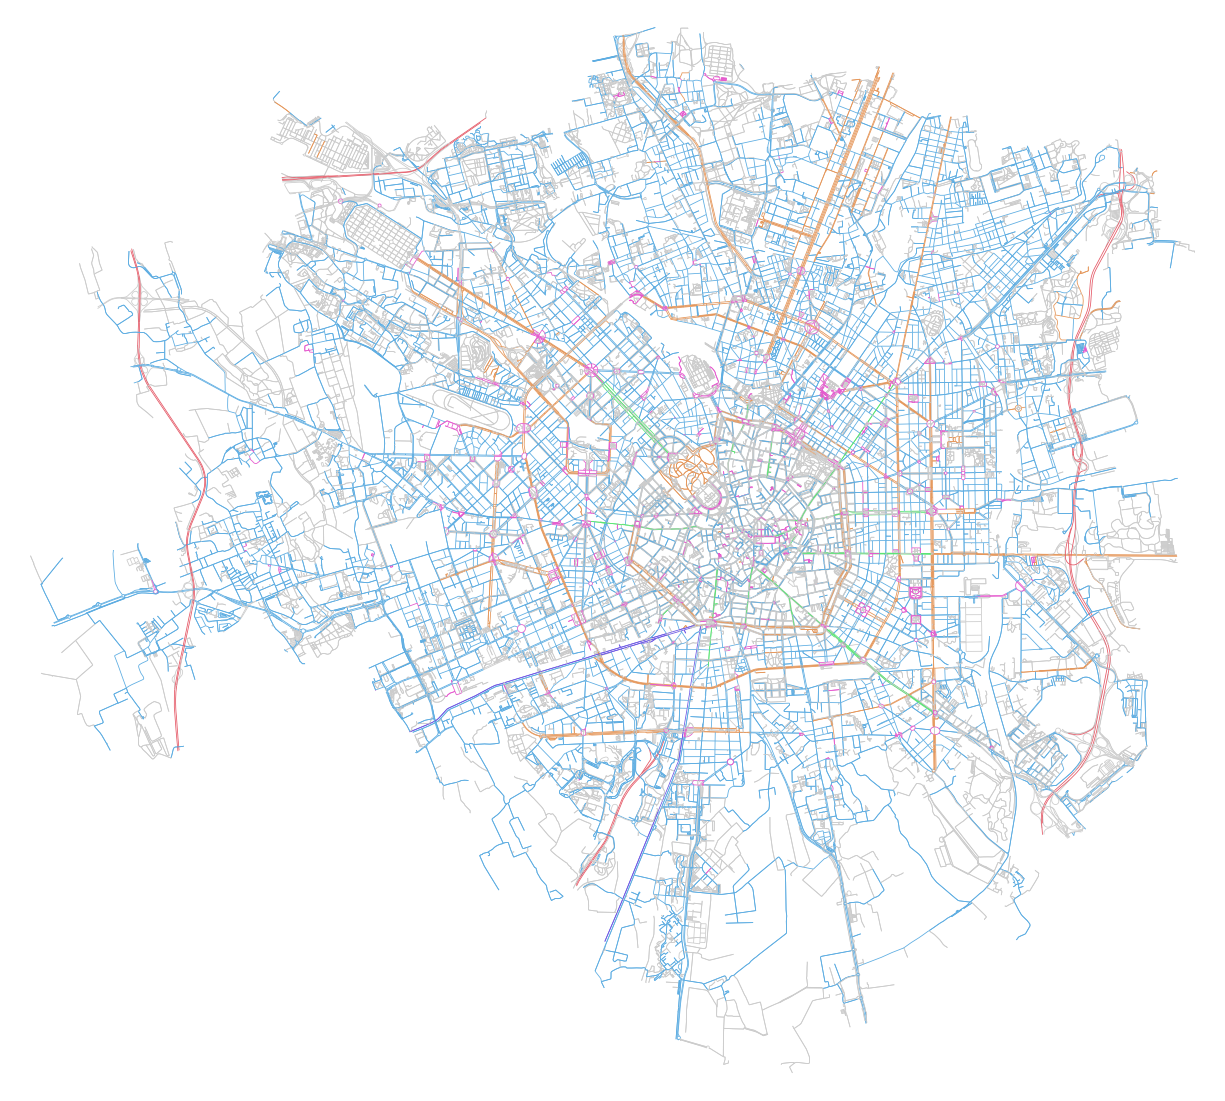

In [80]:
fig, ax = ox.plot_graph(G, node_size=0, edge_color=ce, edge_linewidth = 0.8, fig_height=20, equal_aspect=1)
fig.savefig("Milano.png",dpi=300)

In [30]:
# Calculate descriptive statistics of the drive service 

In [98]:
G = ox.graph_from_place('Milano, Italy' ,simplify = True, network_type='drive')
G = ox.project_graph(G);

stats = ox.basic_stats(G)
extended_stats = ox.extended_stats(G, ecc=False, bc=False, cc=False)
for key, value in extended_stats.items():
    stats[key] = value

In [114]:
#Get total length in Km

all_stats = pd.Series(stats)
total_lengthkm = all_stats['edge_length_total']/1000

In [115]:
edges = ox.graph_to_gdfs(G, nodes=False, edges=True)

In [116]:
# Remove missing values

filtered_edges = edges.dropna(subset=['name', 'length'])

In [155]:
#Get total length of the street matching certain prefixes

streets_length = filtered_edges[['name','length']]
street_list = streets_length['name'].values.tolist()
filterz = 'corso'
total_l = []

for n in range(len(street_list)):
    if type(street_list[n])!=list:
            ns = street_list[n].split()
            if ns[0].lower() == filterz:
                total_l.append(streets_length['length'].iloc[n])
    elif type(street_list[n])==list:
            nls = street_list[n][0]
            ns = nls.split()
            if ns[0].lower() == filterz:
                total_l.append(streets_length['length'].iloc[n])

In [158]:
#Get percentage of the selected edges

length_current_street = sum(total_l)/1000
print(length_current_street/total_lengthkm*100)

1.4351793507498605
